In [9]:
import numpy as np
from pop_growth import pop_growth

In [120]:
L = 5
dt = 0.01
r1 = [1, 2]

data1, t_eval = pop_growth(L, dt, r1)

r2 = [1, 1]
data2, t_eval = pop_growth(L, dt, r2)

r3 = [1, 10]
data3, t_eval = pop_growth(L, dt, r3)

r4 = [4, 13]
data4, t_eval = pop_growth(L, dt, r4)

r5 = [16, 13]
data5, t_eval = pop_growth(L, dt, r5)

r6 = [16, 1]
data6, t_eval = pop_growth(L, dt, r6)

r7 = [18, 7]
data7, t_eval = pop_growth(L, dt, r7)

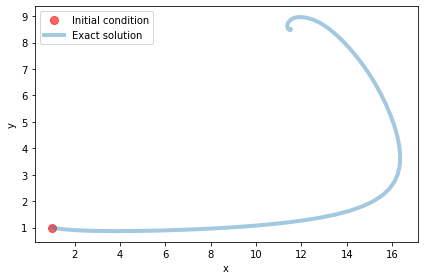

In [121]:
import matplotlib.pyplot as plt

plt.figure()
#plt.plot(data1[0, :], data1[1, :])
plt.plot(r2[0], r2[1], "ro", label = "Initial condition", alpha = 0.6, markersize = 8)

plt.plot(data2[0, :], data2[1, :], label="Exact solution", alpha = 0.4, linewidth = 4)
#plt.plot(data3[0, :], data3[1, :])
#plt.plot(data4[0, :], data4[1, :])
#plt.plot(data5[0, :], data5[1, :])
#plt.plot(data6[0, :], data6[1, :])
#plt.plot(data7[0, :], data7[1, :])
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.autoscale()
plt.tight_layout()
plt.savefig('predpreyex.pdf',dpi=200, bbox_inches = "tight")
plt.show()


In [128]:
import pysindy as ps

X = np.stack((data1[0,:],data1[1,:]), axis = -1)

differentiation_method = ps.FiniteDifference(order = 2)

feature_library = ps.PolynomialLibrary(degree = 3, interaction_only = True)

optimizer = ps.STLSQ(threshold = 0.5)
model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"]
)

model.fit(X, t=t_eval)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=3, interaction_only=True),
      feature_names=['x', 'y'], optimizer=STLSQ(threshold=0.5))

In [129]:
model.print()

(x)' = -4.348 1 + 7.853 x + 24.561 y + -3.015 x y
(y)' = 20.402 1 + -17.520 y + 1.314 x y


In [137]:
r_new = [17, 10]
data_new, t_eval_new = pop_growth(L, dt, r_new)
data_new = data_new.T
sim = model.simulate(r_new, t=t_eval_new)

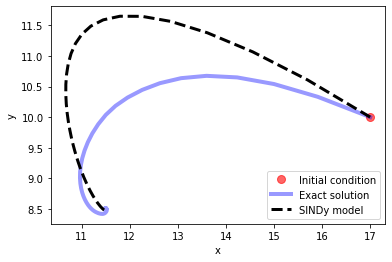

In [138]:
plt.figure()
plt.plot(r_new[0], r_new[1], "ro", label = "Initial condition", alpha = 0.6, markersize = 8)
# exact
plt.plot(data_new[:,0], data_new[:,1], "b", label="Exact solution", alpha = 0.4, linewidth = 4)
# prediction
plt.plot(sim[:,0], sim[:, 1], "k--", label = "SINDy model", linewidth = 3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig('predpreysindyfail.pdf',dpi=200, bbox_inches = "tight")
plt.show()


In [132]:
t_eval_new

array([0.        , 0.01002004, 0.02004008, 0.03006012, 0.04008016,
       0.0501002 , 0.06012024, 0.07014028, 0.08016032, 0.09018036,
       0.1002004 , 0.11022044, 0.12024048, 0.13026052, 0.14028056,
       0.1503006 , 0.16032064, 0.17034068, 0.18036072, 0.19038076,
       0.2004008 , 0.21042084, 0.22044088, 0.23046092, 0.24048096,
       0.250501  , 0.26052104, 0.27054108, 0.28056112, 0.29058116,
       0.3006012 , 0.31062124, 0.32064128, 0.33066132, 0.34068136,
       0.3507014 , 0.36072144, 0.37074148, 0.38076152, 0.39078156,
       0.4008016 , 0.41082164, 0.42084168, 0.43086172, 0.44088176,
       0.4509018 , 0.46092184, 0.47094188, 0.48096192, 0.49098196,
       0.501002  , 0.51102204, 0.52104208, 0.53106212, 0.54108216,
       0.5511022 , 0.56112224, 0.57114228, 0.58116232, 0.59118236,
       0.6012024 , 0.61122244, 0.62124248, 0.63126253, 0.64128257,
       0.65130261, 0.66132265, 0.67134269, 0.68136273, 0.69138277,
       0.70140281, 0.71142285, 0.72144289, 0.73146293, 0.74148